In [1]:
%cd ..

/home/gergopool/work/stylegan2


In [2]:
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys
from io import BytesIO
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio

import pretrained_networks

/home/gergopool/miniconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gergopool/miniconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gergopool/miniconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gergopool/miniconda3/e

In [3]:
network_pkl = "gdrive:networks/stylegan2-ffhq-config-f.pkl"
print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [17]:
# Convert uploaded images to TFRecords
import run_projector
import dream_projector

def dream_project(Gs, network_protobuf_path, layer_name, neuron_index, png_prefix, num_snapshots):
    proj = dream_projector.DreamProjector()
    proj.set_network(Gs, network_protobuf_path, layer_name, neuron_index)
    run_projector.dream_project(proj, png_prefix, num_snapshots)

/home/gergopool/work/stylegan2/dataset_tool.py
Loading images from "./projection/imgs/"
Creating dataset "./projection/records/"
Added 1 images.                         


In [18]:
def vis_all(pb, layer_info):
    
    


network_protobuf_path = 'adam.pb'
layer_name = 'Logits/convolution'
neuron_index = 4 # Bald
fancy_layer_name = 'Adam-Bald' #layer_name.replace("_act/Relu", "")
neuron_index = int(neuron_index)



dream_project(Gs, network_protobuf_path, layer_name, neuron_index, png_prefix='projection/out/image-', num_snapshots=100)

# TODO 300 hardwired already in dream_projector
import shutil
shutil.copyfile('projection/out/image-step%04d.png' % 300, "projection/%s-%03d.png" % (fancy_layer_name, neuron_index))

# Create vid

import glob

imgs = sorted(glob.glob("projection/out/*step*.png"))

movieName = "projection/%s-%03d.mp4" % (fancy_layer_name, neuron_index)
with imageio.get_writer(movieName, mode='I') as writer:
    for filename in imgs:
        image = imageio.imread(filename)

        # Concatenate images with original target image
        w,h = image.shape[0:2]
        canvas = PIL.Image.new('RGBA', (w,h), 'white')
        canvas.paste(Image.fromarray(image), (0, 0))

        writer.append_data(np.array(canvas))

(array([ 69400., 118146., 457576., 529588., 637797., 452772., 466985.,
        181586., 119765., 112113.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

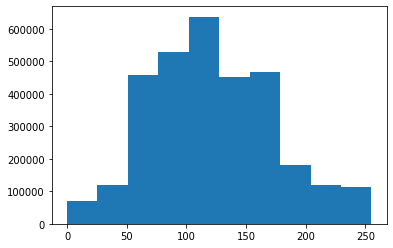

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(image.flatten())